import 하는 과정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

: 

70%이상이 누락되어 있는 열을 날리겠습니다.

KeyError: 5.0

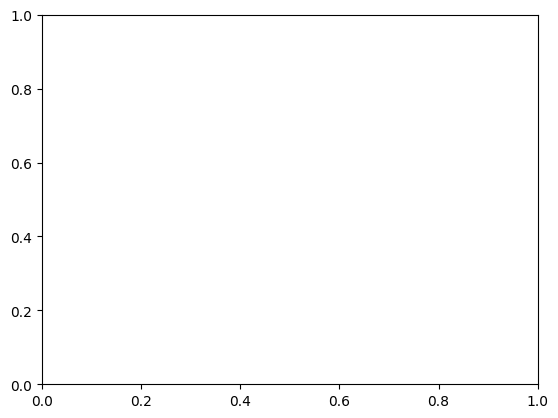

In [8]:
'''

# 데이터 로드
df = pd.read_csv('2023_LoL_match_data.csv')

# Removing columns with more than 90% missing values
#cols_to_drop_90 = df.columns[df.isnull().mean() > 0.9]
#df_cleaned_90 = df.drop(columns=cols_to_drop_90)

df.plot(kind='scatter', x='result', y=5)
plt.show()
'''

AttributeError: 'builtin_function_or_method' object has no attribute 'str'

전처리하는 과정(이상치 날리기)


In [40]:
League = pd.read_csv('2023_LoL_match_data.csv')
print(type(League))
#for i in League:
 #   print(i)
#현재 할 것 리그에서 게임 휫수 10개이하인거 날리기
#League=League.loc[League.GP>=10]

# 'ProductName'을 기준으로 데이터를 그룹화하고, 'TotalSales'의 합계를 계산합니다.
#df_grouped = df.groupby('ProductName')['TotalSales'].sum().reset_index()

# 'team'과 'result' 열만 선택하여 새로운 데이터프레임을 만듭니다.
# 'teamname'과 'result' 열만 선택하여 새로운 데이터프레임을 만듭니다.
df_filtered = League[['teamname', 'result']]

# 데이터의 처음 몇 행을 출력하여 확인합니다.
df_filtered.head()



#L.to_csv("pre_m.csv",index=False)



<class 'pandas.core.frame.DataFrame'>


,teamname,result
0,Klanik Esport,1
1,Klanik Esport,1
2,Klanik Esport,1
3,Klanik Esport,1
4,Klanik Esport,1


In [11]:
plt.figure(figsize=(300, 400))

<Figure size 30000x40000 with 0 Axes>

<Figure size 30000x40000 with 0 Axes>

In [12]:
# 팀별 승리 횟수 계산
team_wins = df_filtered[df_filtered['result'] == 1].groupby('teamname')['result'].count().reset_index()
team_wins.columns = ['teamname', 'wins']

# 팀별 전체 게임 수 계산
team_total_games = df_filtered.groupby('teamname')['result'].count().reset_index()
team_total_games.columns = ['teamname', 'total_games']

# 결과를 확인합니다.
team_wins.head(), team_total_games.head()


(                  teamname  wins
 0              100 Thieves   132
 1  100 Thieves Challengers   144
 2                19esports   108
 3              3BL Esports    78
 4                  5 Ronin     6,
                   teamname  total_games
 0              100 Thieves          306
 1  100 Thieves Challengers          240
 2                19esports          168
 3              3BL Esports          246
 4                  5 Ronin           84)

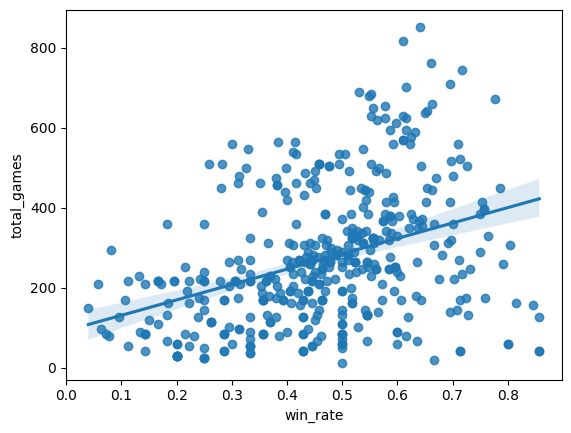

In [41]:
# 팀별 승리 횟수와 전체 게임 수를 병합합니다.
team_stats = pd.merge(team_wins, team_total_games, on='teamname')

# 승률을 계산합니다.
team_stats['win_rate'] = team_stats['wins'] / team_stats['total_games']

# 결과를 확인합니다.
team_stats
#team_stats.to_csv("teamname,wins,total_games,win_rate.csv",index=False)
#groupby('teamname').agg({' ' : 'mean})
sb.regplot(x='win_rate', y='total_games', data=team_stats)



#뒤에 쪽에 비교할 것들 나중에 비교 할 것드롤 묶어주면 된다.

#League['position'=='team'].unique()
a= League['teamid'].unique()
League=League.loc[League['position']=='team',['teamid']]

#팀은 unique로 날려주고
#팀이 뜬다면 mean으로 result를 잡아서 평균을 내주는 과정

승률과 연관있는 그래프

In [15]:

#관계가 1도 없다.
pos=League[['Pos','W%']]
pos=pos.sort_values(by='W%')
pos.plot(y='W%',x='Pos',kind='scatter')




KeyError: "None of [Index(['Pos', 'W%'], dtype='object')] are in the [columns]"

In [ ]:
#어느정도 관계성을 가진다.(아닌거 같기도)
kda=League[['KDA','W%']]
kda=kda.sort_values(by='W%')
kda.plot(y='W%',x='KDA',kind='scatter')

NameError: name 'ceil' is not defined

<Axes: xlabel='DTH%', ylabel='W%'>

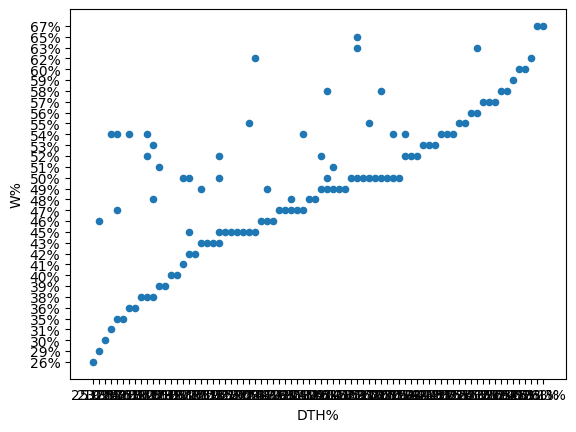

In [ ]:
dth=League[['DTH%','W%']]
dth=dth.sort_values(by='W%')
dth.plot(y='W%',x='DTH%',kind='scatter')

Dropping any 'partial' data points


In [ ]:

print(pd.unique(League.datacompleteness))
League = League[League['datacompleteness'] == 'complete']
print(pd.unique(League.datacompleteness))


['complete' 'partial']
['complete']


Leagues present in dataset

In [ ]:
pd.unique(League.league)

array(['LFL2', 'DDH', 'EL', 'GL', 'LCKC', 'NEXO', 'UL', 'LVP SL', 'LCK',
       'LFL', 'PRM', 'LMF', 'SL (LATAM)', 'VL', 'CBLOL', 'LEC', 'NACL',
       'LCO', 'CBLOLA', 'LHE', 'NLC', 'GLL', 'ESLOL', 'LLA', 'EBL', 'TCL',
       'PGN', 'LPLOL', 'LCS', 'HM', 'LJL', 'HC', 'AL', 'PCS', 'VCS', 'EM',
       'MSI', 'LAS', 'LRN', 'LRS', 'EPL', 'LJLA', 'CT', 'WLDs'],
      dtype=object)

## LCK 데이터만 가지는 데이터프레임 생성

In [ ]:
LCK = League[League['league'] == 'LCK']

## 스프링, 썸머시즌 각각을 가지는 데이터프레임 생성

In [ ]:
LCKSpring = LCK[LCK['split']=='Spring']

LCKSummer = LCK[LCK['split']=='Summer']

KeyError: 'split'

In [ ]:
LCKSpring

NameError: name 'LCKSpring' is not defined

## LCK에서 나온 챔피언 종류 (unique)

In [ ]:
np.sort(pd.unique(LCK['champion'].astype(str)))

array(['Aatrox', 'Ahri', 'Akali', 'Alistar', 'Amumu', 'Annie', 'Aphelios',
       'Ashe', 'Aurelion Sol', 'Azir', 'Blitzcrank', 'Braum', 'Caitlyn',
       'Camille', 'Cassiopeia', "Cho'Gath", 'Corki', 'Darius', 'Diana',
       'Draven', 'Elise', 'Ezreal', 'Fiora', 'Galio', 'Gangplank', 'Gnar',
       'Gragas', 'Graves', 'Gwen', 'Heimerdinger', 'Illaoi', 'Irelia',
       'Ivern', 'Jarvan IV', 'Jax', 'Jayce', 'Jhin', 'Jinx', "K'Sante",
       "Kai'Sa", 'Kalista', 'Karma', 'Kassadin', 'Kayle', 'Kennen',
       "Kha'Zix", 'Kindred', "Kog'Maw", 'LeBlanc', 'Lee Sin', 'Leona',
       'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite',
       'Maokai', 'Milio', 'Miss Fortune', 'Morgana', 'Nami', 'Nautilus',
       'Neeko', 'Nidalee', 'Nilah', 'Nocturne', 'Olaf', 'Orianna', 'Ornn',
       'Pantheon', 'Poppy', 'Pyke', 'Quinn', 'Rakan', "Rek'Sai", 'Rell',
       'Renata Glasc', 'Renekton', 'Rumble', 'Ryze', 'Samira', 'Sejuani',
       'Senna', 'Seraphine', 'Sett', 'Singed', 'Sion', 'Sivir

## 니코 평균승률 (본인 주챔은 프로에서 승률이 얼마인지 확인해보기)

In [ ]:
LCK[LCK['champion']=='Neeko'].groupby('champion').agg({'result':'mean'}).sort_values('result')

,result
champion,
Neeko,0.633333


### Making a dataframe of champion picks during Spring Split

In [ ]:
test = LCK[LCK['split']=='Spring'].champion.value_counts()
test = test.to_frame()
test = test.rename(columns={"champion": "SpringPicks"})


KeyError: 'split'

Making a dataframe of champion picks during Summer Split


In [ ]:
test2 = LCK[LCK['split']=='Summer'].champion.value_counts()
test2 = test2.to_frame()
test2 = test2.rename(columns={"champion": "SummerPicks"})


 Joining the two data frames


In [ ]:
SplitPicks = test.join(test2,how='outer')


ValueError: columns overlap but no suffix specified: Index(['count'], dtype='object')

 Fill NAN as 0 picks


In [ ]:
SplitPicks = SplitPicks.fillna(0)



Quick formula to calculate percent change

In [ ]:

def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

SplitPicks['Pick Difference'] = percentage_change(SplitPicks['SpringPicks'],SplitPicks['SummerPicks'])


Reseting Index to make 'champion' a column


In [ ]:

SplitPicks = SplitPicks.reset_index().rename(columns={"index":"Champion"})
SplitPicks

,Champion,SpringPicks,SummerPicks,Pick Difference
0,Aatrox,2.0,23.0,1050.000000
1,Ahri,28.0,44.0,57.142857
2,Akali,44.0,10.0,-77.272727
3,Alistar,1.0,54.0,5300.000000
4,Amumu,0.0,1.0,inf
...,...,...,...,...
117,Zac,1.0,1.0,0.000000
118,Zeri,122.0,60.0,-50.819672
119,Ziggs,4.0,2.0,-50.000000
120,Zilean,2.0,0.0,-100.000000


Create a list of Win Rates in specific Splits then Join that thoses lists into the SplitPicks DataFrame

In [ ]:

springWin = LCKSpring.groupby('champion')['result'].mean()
summerWin = LCKSummer.groupby('champion')['result'].mean()

springWin = springWin.to_frame()
summerWin = summerWin.to_frame()

springWin = springWin.reset_index()
summerWin = summerWin.reset_index()
springWin = springWin.rename(columns={"champion": "Champion",'result':'SpringResult'})
summerWin = summerWin.rename(columns={"champion": "Champion",'result':'SummerResult'})

SplitPicks = SplitPicks.merge(springWin,on='Champion')
SplitPicks = SplitPicks.merge(summerWin,on='Champion')
SplitPicks['Win Difference'] = percentage_change(SplitPicks['SpringResult'],SplitPicks['SummerResult'])





Rearranging Columns

In [ ]:
SplitPicks = SplitPicks[["Champion","SpringPicks","SpringResult","SummerPicks","SummerResult","Win Difference","Pick Difference"]]

<Axes: xlabel='SpringPicks', ylabel='SummerPicks'>

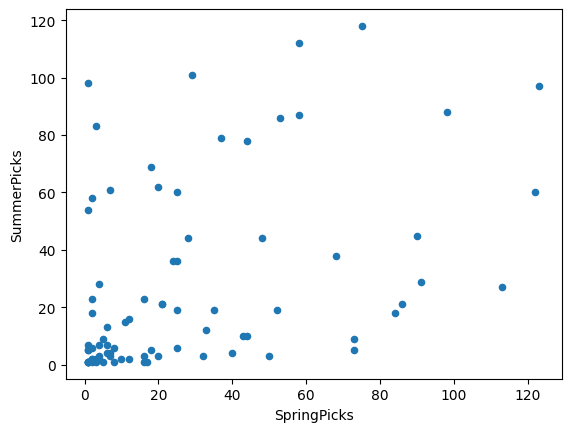

In [ ]:
SplitPicks.plot(x='SpringPicks',y='SummerPicks',kind='scatter')

 Plotting Scatterplot

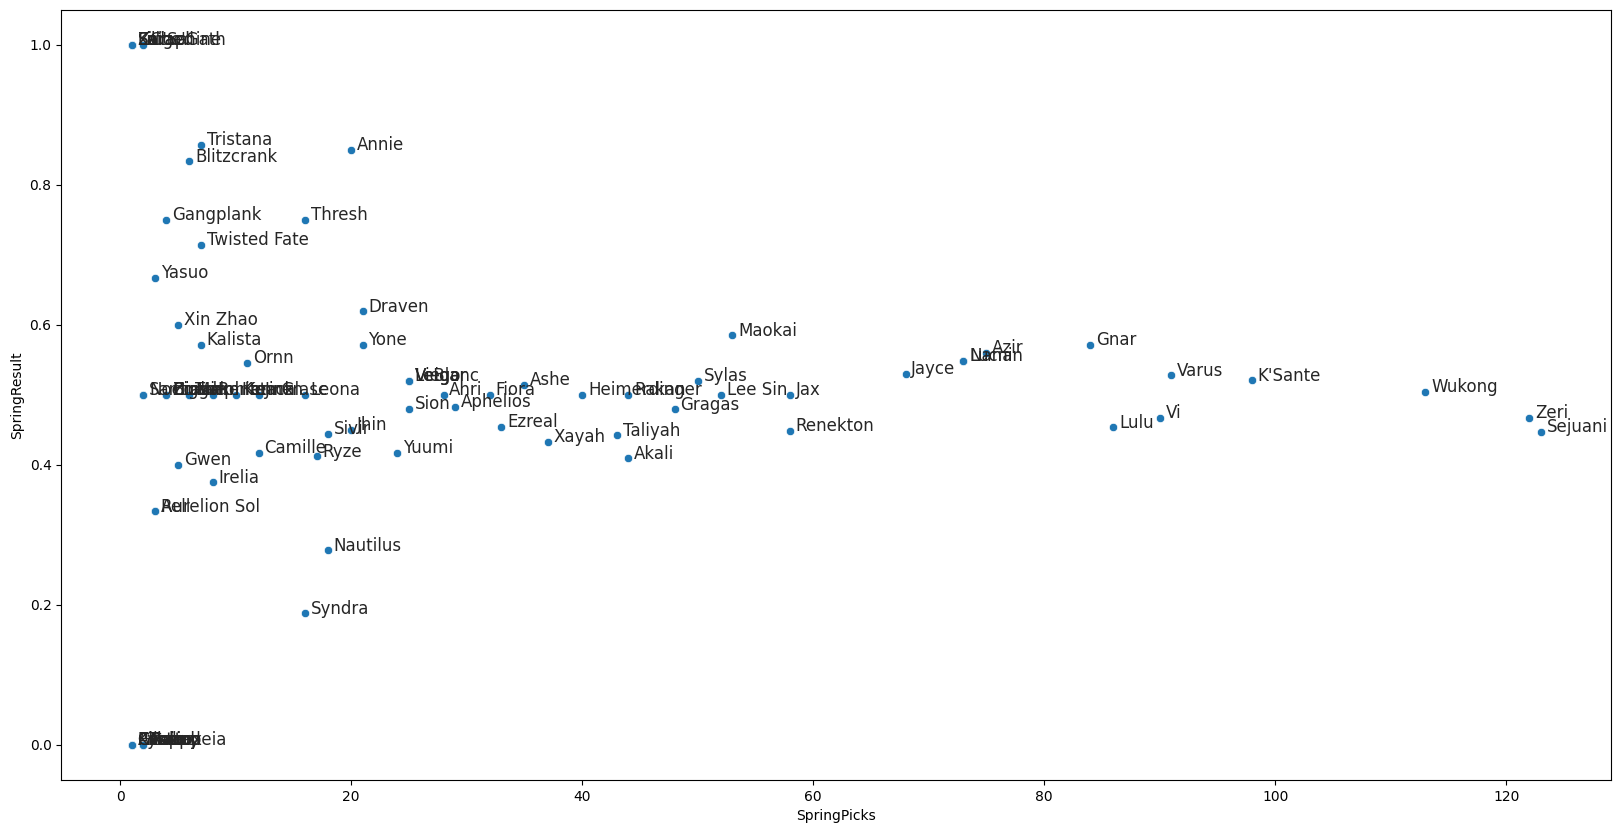

In [ ]:

fig, ax = plt.subplots(figsize=(20,10))
sb.set(style="ticks")
sb.set_style("white")
sb.scatterplot(ax=ax, data=SplitPicks, x='SpringPicks',y='SpringResult')

add labels here

In [ ]:
for v in SplitPicks.iterrows():
    plt.text(v[1][1]+0.5, v[1][2], f'{v[1][0]}')

In [ ]:
%cd /content/drive/MyDrive/test

/content/drive/MyDrive/test


In [ ]:
SplitPicks.to_csv('SplitPicks.csv')

In [ ]:
len(pd.unique(League['gameid']))

8306

In [ ]:
League[(League['infernals'] > 1) | (League['mountains'] > 1)| (League['clouds'] > 1 )|(League['oceans'] > 1)].groupby('league')['infernals','mountains','clouds','oceans'].sum()

<ipython-input-29-26b3a5554d74>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  League[(League['infernals'] > 1) | (League['mountains'] > 1)| (League['clouds'] > 1 )|(League['oceans'] > 1)].groupby('league')['infernals','mountains','clouds','oceans'].sum()


,infernals,mountains,clouds,oceans
league,,,,
AL,75.0,55.0,82.0,39.0
CBLOL,145.0,128.0,127.0,119.0
CBLOLA,96.0,100.0,85.0,118.0
CT,16.0,13.0,16.0,24.0
DDH,41.0,32.0,30.0,29.0
EBL,59.0,70.0,51.0,75.0
EL,16.0,11.0,17.0,10.0
EM,87.0,97.0,120.0,96.0
EPL,25.0,15.0,25.0,13.0


In [ ]:
drakes = League[(League['position']=='team')].groupby(['league','gameid'])['infernals','mountains','clouds','oceans'].sum()
drakesouls = drakes[drakes>1]
drakesouls = drakesouls.notnull().astype('int')
leaguesouls = drakesouls.groupby('league').sum()
leaguesouls = leaguesouls.reset_index()

<ipython-input-30-b05e7412baa3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drakes = League[(League['position']=='team')].groupby(['league','gameid'])['infernals','mountains','clouds','oceans'].sum()


In [ ]:
leaguesouls

,league,infernals,mountains,clouds,oceans
0,AL,23,15,31,16
1,CBLOL,48,41,39,37
2,CBLOLA,32,37,27,40
3,CT,6,8,3,8
4,DDH,13,13,10,7
5,EBL,19,26,18,25
6,EL,6,4,6,2
7,EM,32,32,45,33
8,EPL,12,12,9,6
9,ESLOL,18,23,20,15


<Axes: >

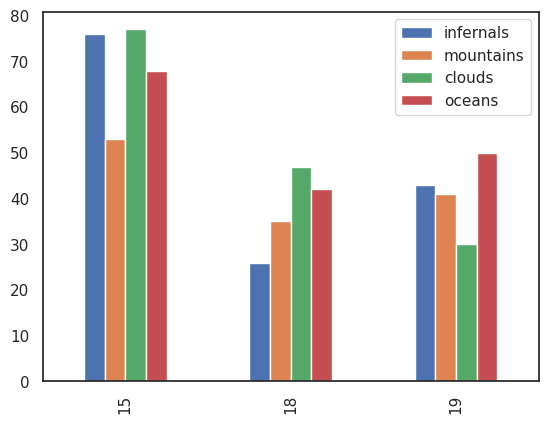

In [ ]:
leaguesouls[(leaguesouls['league']=='LCK')|(leaguesouls['league']=='LPL')|(leaguesouls['league']=='LCS')|(leaguesouls['league']=='LEC')].plot(kind='bar')